In [1]:
!ls

compare_models.ipynb			model_small_bound.json
data					model_small_bound.json.result
evaluate_distilled_model_results.ipynb	nn_connector_model.py
evaluate_model_all_data.ipynb		predict_and_save.ipynb
evaluate_predictions.ipynb		preprocess_data.ipynb
extract_sequences.ipynb			__pycache__
model_counterexample.dot		ROC_distilled_model_bgl.png
model_counterexample.json		roc_network_bgl.png
model_counterexample.json.result	test_data.pk
model.keras				train_data.pk
model_large_bound.dot			train_model.ipynb
model_large_bound.json			write_test_set_to_abbadingo.ipynb
model_large_bound.json.result		write_train_set_to_abbadingo.ipynb
model_small_bound.dot			X_pred.pk


In [2]:
!ls data

BGL_preprocessed.less_templates.csv  sequences.dat
BGL_preprocessed.standard.csv	     sequences_less_templates.dat
distilled_model_mu_large	     X_test.dat
labels_less_templates.txt	     X_train.dat
labels.txt			     X_train_less_sequences.dat
README.md			     y_test.txt


In [3]:
import pandas as pd
import pickle as pk

label_file = "data/y_test.txt"
results_file = "model_counterexample.json.result"

df = pd.read_csv(results_file, delimiter=";")
df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""0 10 9 140 140 140 140 140 140 166 166 166""","[7,86,51,66,64,68,2,118,100,12,12]","[-5.62364,-3.65108,-15.6615,-4.70002,-2.64171...",-98.0907,-8.91734,-26.5857
1,1,"""1 10 231 231 231 231 231 231 231 231 231 231""","[29,53,77,112,20,130,22,38,20,130,130]","[-17.3809,-16.2068,-24.9351,-17.3711,-17.5844...",-183.3670,-16.66970,-24.9351
2,1,"""1 10 231 231 231 231 231 231 231 231 231 231""","[29,53,77,112,20,130,22,38,20,130,130]","[-17.3809,-16.2068,-24.9351,-17.3711,-17.5844...",-183.3670,-16.66970,-24.9351
3,1,"""0 10 316 316 316 316 316 316 89 89 316 316""","[128,15,66,105,124,82,2,12,104,82,82]","[-6.01652,-0.602545,-13.346,-12.5388,-14.2605...",-95.8208,-8.71098,-14.2605
4,1,"""1 10 231 231 231 231 231 231 231 231 231 231""","[29,53,77,112,20,130,22,38,20,130,130]","[-17.3809,-16.2068,-24.9351,-17.3711,-17.5844...",-183.3670,-16.66970,-24.9351
...,...,...,...,...,...,...,...
587581,1,"""1 10 95 95 95 95 95 95 95 95 71 203""","[41,4,80,24,4,80,24,4,113,33,33]","[-11.8561,-1.856,-17.6504,-6.25374,-12.956,-1...",-133.0920,-12.09930,-24.4183
587582,1,"""0 10 82 63 30 82 63 30 82 63 30 82""","[36,23,2,2,4,118,114,23,2,2,2]","[-4.50368,-0.177171,-15.3059,-10.6527,-17.811...",-129.8720,-11.80650,-28.4928
587583,1,"""0 10 165 165 165 165 165 165 165 165 165 165""","[69,23,100,23,100,23,100,23,100,23,23]","[-0.792445,-0.063088,-7.89256,-18.0833,-7.892...",-106.5490,-9.68625,-18.0833
587584,1,"""0 10 165 165 13 13 13 165 165 165 13 13""","[69,23,4,21,4,68,2,2,51,12,12]","[-0.792445,-0.063088,-4.21002,-5.13412,-10.78...",-49.7469,-4.52244,-12.2165


In [4]:
y = list()
with open(label_file, "rt") as inf:
    for line in inf:
        line = line.strip("\n")
        y.append(int(line))
len(df), len(y)

(587586, 587586)

In [5]:
df.columns

Index(['row nr', ' abbadingo trace', ' state sequence', ' score sequence',
       ' sum scores', ' mean scores', ' min score'],
      dtype='object')

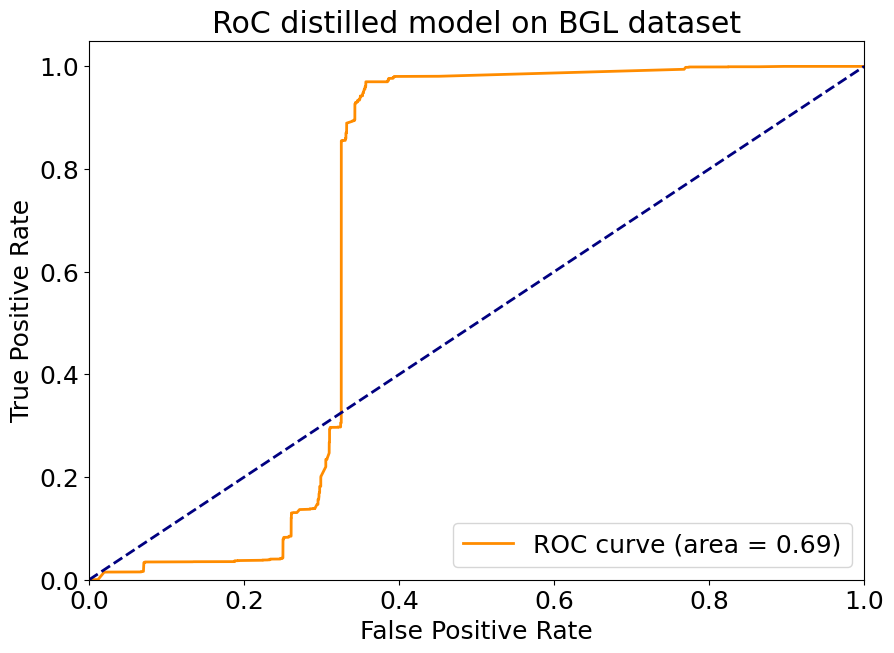

In [6]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

score = -df[" min score"]

fpr, tpr, thresholds = roc_curve(y, score)
roc_auc = roc_auc_score(y, score)

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC distilled model on BGL dataset")
plt.legend(loc="lower right")
plt.savefig("ROC_distilled_model_bgl.png")